In [4]:
import warnings
warnings.filterwarnings('ignore')

import math
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [5]:
base_treino = pd.read_csv('./data/mini_inidice_RL1.csv')
base_teste = pd.read_csv('./data/mini_indice_teste.csv')

In [6]:
base_treino

,Data,Fechamento
0,2021-07-08,125700
1,2021-07-08,125725
2,2021-07-08,125790
3,2021-07-08,125800
4,2021-07-08,125795
...,...,...
528,2021-07-08,125185
529,2021-07-08,125105
530,2021-07-08,125125
531,2021-07-08,125240


In [7]:
treino = base_treino.drop('Data', axis =1)
treino.values

array([[125700],
       [125725],
       [125790],
       [125800],
       [125795],
       [125785],
       [125860],
       [125840],
       [125805],
       [125825],
       [125805],
       [125805],
       [125850],
       [125805],
       [125805],
       [125835],
       [125835],
       [125830],
       [125810],
       [125790],
       [125800],
       [125870],
       [125835],
       [125815],
       [125830],
       [125785],
       [125835],
       [125820],
       [125825],
       [125830],
       [125775],
       [125755],
       [125730],
       [125805],
       [125850],
       [125835],
       [125875],
       [125870],
       [125855],
       [125840],
       [125805],
       [125780],
       [125765],
       [125775],
       [125725],
       [125695],
       [125730],
       [125770],
       [125740],
       [125735],
       [125785],
       [125785],
       [125810],
       [125850],
       [125875],
       [125855],
       [125910],
       [125785],
       [125835

In [8]:
#teste = base_teste.drop('Data', axis =1)
#teste.values

In [9]:
normalizador = MinMaxScaler(feature_range = (0,1))
base_treinamento_normalizada = normalizador.fit_transform(treino)

In [10]:
base_treinamento_normalizada.shape

(533, 1)

In [11]:
previsores = []
preco_real = []
for i in range(32, 533):
    previsores.append(base_treinamento_normalizada[i-32:i, 0])
    preco_real.append(base_treinamento_normalizada[i,0])

In [12]:
previsores, preco_real = np.array(previsores), np.array(preco_real) 

In [13]:
previsores

array([[0.57055215, 0.58588957, 0.62576687, ..., 0.65030675, 0.61656442,
        0.60429448],
       [0.58588957, 0.62576687, 0.63190184, ..., 0.61656442, 0.60429448,
        0.58895706],
       [0.62576687, 0.63190184, 0.62883436, ..., 0.60429448, 0.58895706,
        0.63496933],
       ...,
       [0.39263804, 0.3404908 , 0.32822086, ..., 0.19631902, 0.25460123,
        0.20552147],
       [0.3404908 , 0.32822086, 0.33742331, ..., 0.25460123, 0.20552147,
        0.21779141],
       [0.32822086, 0.33742331, 0.36503067, ..., 0.20552147, 0.21779141,
        0.28834356]])

In [14]:
previsores = np.reshape(previsores, (previsores.shape[0], previsores.shape[1], 1))

In [15]:
es = tf.keras.callbacks.EarlyStopping(monitor='loss', min_delta=1e-10, patience=10, verbose=1)
rlr = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.2, patience=5, verbose=1)
mcp = tf.keras.callbacks.ModelCheckpoint(filepath='pesos1.h5', monitor='loss', save_best_only=True, verbose=1)

In [16]:
#regressor

regressor = tf.keras.models.Sequential()
regressor.add(tf.keras.layers.LSTM(units= 64, return_sequences = True, input_shape=(previsores.shape[1], 1)))
regressor.add(tf.keras.layers.Dropout(0.3))

regressor.add(tf.keras.layers.LSTM(units= 32, return_sequences = True))
regressor.add(tf.keras.layers.Dropout(0.2))

regressor.add(tf.keras.layers.LSTM(units= 32, return_sequences = True))
regressor.add(tf.keras.layers.Dropout(0.2))

regressor.add(tf.keras.layers.LSTM(units= 32))
regressor.add(tf.keras.layers.Dropout(0.20))

regressor.add(tf.keras.layers.Dense(units = 1, activation = 'linear'))

regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error', metrics = ['mean_absolute_error'])

regressor.fit(previsores, preco_real, epochs =1000, batch_size = 32, callbacks = [es, rlr, mcp])

#model.add(tf.keras.layers.Dense(units=32, activation='tanh', input_shape=(self.state_size,)))
#model.compile(loss = "mse", optimizer = tf.keras.optimizers.Adam(lr = 0.001))
#historico = regressor.fit(previsores, preco_real, epochs = 200, batch_size = 32)

Epoch 1/1000
15/16 [===========================>..] - ETA: 0s - loss: 0.0623 - mean_absolute_error: 0.1918
Epoch 00001: loss improved from inf to 0.06098, saving model to pesos1.h5
16/16 [==============================] - 0s 29ms/step - loss: 0.0610 - mean_absolute_error: 0.1899
Epoch 2/1000
15/16 [===========================>..] - ETA: 0s - loss: 0.0308 - mean_absolute_error: 0.1429
Epoch 00002: loss improved from 0.06098 to 0.03016, saving model to pesos1.h5
16/16 [==============================] - 0s 28ms/step - loss: 0.0302 - mean_absolute_error: 0.1413
Epoch 3/1000
15/16 [===========================>..] - ETA: 0s - loss: 0.0287 - mean_absolute_error: 0.1345
Epoch 00003: loss improved from 0.03016 to 0.02862, saving model to pesos1.h5
16/16 [==============================] - 0s 29ms/step - loss: 0.0286 - mean_absolute_error: 0.1343
Epoch 4/1000
15/16 [===========================>..] - ETA: 0s - loss: 0.0237 - mean_absolute_error: 0.1217
Epoch 00004: loss improved from 0.02862 to 0.

In [17]:
teste = base_teste.drop('Data', axis =1)
teste.values

array([[127775],
       [127860],
       [127845],
       [127840],
       [127840],
       [127870],
       [127840],
       [127890],
       [127850],
       [127845],
       [127835],
       [127870],
       [127890],
       [127820],
       [127815],
       [127825],
       [127800],
       [127780],
       [127810],
       [127795],
       [127840],
       [127835],
       [127800],
       [127785],
       [127800],
       [127815],
       [127830],
       [127830],
       [127810],
       [127815],
       [127815],
       [127760],
       [127815],
       [127830],
       [127835],
       [127815],
       [127855],
       [127845],
       [127830],
       [127890],
       [127930],
       [127930],
       [127970],
       [127945],
       [127950],
       [127965],
       [127945],
       [127930],
       [127940],
       [127880],
       [127860],
       [127870],
       [127880],
       [127870],
       [127855],
       [127840],
       [127875],
       [127870],
       [127890

In [18]:
entradas = teste.values

In [19]:
entradas.shape

(361, 1)

In [20]:
normalizador = MinMaxScaler(feature_range = (0,1))
entradas = normalizador.fit_transform(entradas)

In [21]:
entradas.dtype

dtype('float64')

In [22]:
x_teste = []
for i in range (32, 361):
    x_teste.append(entradas[i-32:i , 0 ])
x_teste = np.array(x_teste)
x_teste = np.reshape(x_teste, (x_teste.shape[0], x_teste.shape[1], 1))

In [23]:
x_teste.shape

(329, 32, 1)

In [24]:
previsoes = regressor.predict(x_teste)

In [25]:
previsoes = normalizador.inverse_transform(previsoes)

In [26]:
previsoes.shape

(329, 1)

In [27]:
entry = teste[32:]

In [28]:
entry.values.shape

(329, 1)

In [29]:
resultado = np.concatenate([entry, previsoes], axis=1)

In [30]:
resultado = pd.DataFrame(resultado)

In [31]:
resultado['total'] = resultado[0] - resultado[1]

In [32]:
resultado.head(15)

,0,1,total
0,127815.0,127795.640625,19.359375
1,127830.0,127790.531250,39.468750
2,127835.0,127787.421875,47.578125
3,127815.0,127787.914062,27.085938
4,127855.0,127791.578125,63.421875
5,127845.0,127799.031250,45.968750
6,127830.0,127809.085938,20.914062
7,127890.0,127818.117188,71.882812
8,127930.0,127827.578125,102.421875
9,127930.0,127839.656250,90.343750


In [35]:
base_teste2 = pd.read_csv('./data-projects/mini_inidice_novo.csv')

In [36]:
base_teste2.drop('Abertura', axis=1, inplace = True)
base_teste2.drop('Mínima', axis=1, inplace = True)
base_teste2.drop('Máxima', axis=1, inplace = True)

In [37]:
base_teste2

,Data,Fechamento
0,2021-07-12,128465
1,2021-07-12,128435
2,2021-07-12,128410
3,2021-07-12,128410
4,2021-07-12,128425
...,...,...
4994,2021-06-28,127895
4995,2021-06-28,127950
4996,2021-06-28,127940
4997,2021-06-28,128010


In [38]:
base_teste2 = base_teste.drop('Data', axis =1)

In [39]:
base_teste2 = base_teste2[:367]

In [40]:
base_teste2

,Fechamento
0,127775
1,127860
2,127845
3,127840
4,127840
...,...
356,127320
357,127330
358,127345
359,127250


In [41]:
base_teste2.values

array([[127775],
       [127860],
       [127845],
       [127840],
       [127840],
       [127870],
       [127840],
       [127890],
       [127850],
       [127845],
       [127835],
       [127870],
       [127890],
       [127820],
       [127815],
       [127825],
       [127800],
       [127780],
       [127810],
       [127795],
       [127840],
       [127835],
       [127800],
       [127785],
       [127800],
       [127815],
       [127830],
       [127830],
       [127810],
       [127815],
       [127815],
       [127760],
       [127815],
       [127830],
       [127835],
       [127815],
       [127855],
       [127845],
       [127830],
       [127890],
       [127930],
       [127930],
       [127970],
       [127945],
       [127950],
       [127965],
       [127945],
       [127930],
       [127940],
       [127880],
       [127860],
       [127870],
       [127880],
       [127870],
       [127855],
       [127840],
       [127875],
       [127870],
       [127890

In [42]:
base_atual = base_teste2.values

In [43]:
normalizador = MinMaxScaler(feature_range = (0,1))
base_atual = normalizador.fit_transform(base_atual)

In [44]:
base_atual

array([[0.78089888],
       [0.87640449],
       [0.85955056],
       [0.85393258],
       [0.85393258],
       [0.88764045],
       [0.85393258],
       [0.91011236],
       [0.86516854],
       [0.85955056],
       [0.84831461],
       [0.88764045],
       [0.91011236],
       [0.83146067],
       [0.8258427 ],
       [0.83707865],
       [0.80898876],
       [0.78651685],
       [0.82022472],
       [0.80337079],
       [0.85393258],
       [0.84831461],
       [0.80898876],
       [0.79213483],
       [0.80898876],
       [0.8258427 ],
       [0.84269663],
       [0.84269663],
       [0.82022472],
       [0.8258427 ],
       [0.8258427 ],
       [0.76404494],
       [0.8258427 ],
       [0.84269663],
       [0.84831461],
       [0.8258427 ],
       [0.87078652],
       [0.85955056],
       [0.84269663],
       [0.91011236],
       [0.95505618],
       [0.95505618],
       [1.        ],
       [0.97191011],
       [0.97752809],
       [0.99438202],
       [0.97191011],
       [0.955

In [45]:
y_teste = []
for i in range (32, 361):
    y_teste.append(entradas[i-32:i , 0 ])
y_teste = np.array(y_teste)
y_teste = np.reshape(y_teste, (y_teste.shape[0], y_teste.shape[1], 1))

In [46]:
y_teste.shape

(329, 32, 1)

In [47]:
previsoes2 = regressor.predict(y_teste)

In [48]:
previsoes2 = normalizador.inverse_transform(previsoes2)

In [49]:
previsoes2.shape

(329, 1)

In [50]:
entry2 = base_atual[32:]

In [51]:
resultado2 = np.concatenate([entry, previsoes2], axis=1)

In [52]:
resultado2 = pd.DataFrame(resultado)

In [53]:
#resultado2['Total'] = resultado[0] - resultado[1]
resultado2

,0,1,total
0,127815.0,127795.640625,19.359375
1,127830.0,127790.531250,39.468750
2,127835.0,127787.421875,47.578125
3,127815.0,127787.914062,27.085938
4,127855.0,127791.578125,63.421875
...,...,...,...
324,127320.0,127355.070312,-35.070312
325,127330.0,127354.210938,-24.210938
326,127345.0,127353.695312,-8.695312
327,127250.0,127352.976562,-102.976562


In [54]:
resultado2['total'] = resultado2[0] - resultado2[1]

In [55]:
resultado2.head(50)

,0,1,total
0,127815.0,127795.640625,19.359375
1,127830.0,127790.531250,39.468750
2,127835.0,127787.421875,47.578125
3,127815.0,127787.914062,27.085938
4,127855.0,127791.578125,63.421875
5,127845.0,127799.031250,45.968750
6,127830.0,127809.085938,20.914062
7,127890.0,127818.117188,71.882812
8,127930.0,127827.578125,102.421875
9,127930.0,127839.656250,90.343750


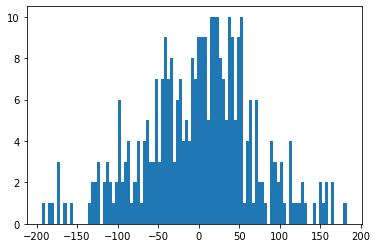

In [56]:
import matplotlib.pyplot as plt
plt.hist(resultado2['total'], bins=100)
plt.show()

In [57]:
# distribuição dessa regressão e quando alcancar 2 desvios padrão entrar contra